# Programming Session III

During this session, we will learn how to use unsupervised methods. 
You already started using some of them in the homework. The session is organized around 3 main exerices. It is suggested to complete the exercices in the following order: 1 (including 1.1,1.2),3.1,2,3.2 and then 1.3.

- __Exercice 1__ focuses on various applications of ICA ranging from medicine to finance, including speech processing.
- __Exercice 2__ uses manifold learning to extract a lower dimensional representation from a short movie
- __Exercice 3__ uses hierarchical clustering to extract information from the genetic expression of cancerous cells

## 1. Independent Component Analysis, seizure prediction, sound source separation and market analysis

For this first exercice, we will consider three applications of independent component analysis. 
- In the __first application__, we will use ICA to remove artefacts from EEG signals, this is useful in the understanding of cognitive processes or to predict and detect abnormal activity such as in epileptic seizure. 
- In the __second application__, we will use ICA to extract a conversation from some background (music) noise
- In the third exercice, we will use ICA to extract latent factors from financial data

### 1.1. Cleaning EEG from ocular artefacts

sources: 
 - https://martinos.org/, 
 - JUNG et al.,Removing electroencephalographic artifacts by blind source separation,
 - C Brunner, Removing eye activity from EEG signals via ICA

In this exercice we will use ICA to separate the sources in an EEG signal. In particular, we will extract the electric signal arising from eye movements. 

When doing an EEG we are usually interested in understanding and comparing the behavior of populations of neurons across the brain. EEG recordings have also been assesed as objective markers of consciousness (see Q.Noirhomme and S Laureys, "Consciousness and Unconsciousness:
An EEG Perspective", http://journals.sagepub.com/doi/pdf/10.1177/1550059413519518)

The electrode map is pretty standard (see below for an example)

<img src="mapEEG1.png" height="250" width="250" align="center"/>


The first thing to do is to identify the location/geography of each EEG signal. Then one approach is to count the number of peaks (cycles) within a given time interval. One of the things we might want to study is reactivity. I.e if you pinch someone, the EEG is supposed to get faster. More generally, we are interested in responses to stimulations, pain, ligth,..
As an example, when you hyperventilate, CO2 goes down with cerebral blood flow and you see a slowing of EEG. Such slowing is normal but if you see slowing on only one side of the brain and not the other that might reveal vascular insufficiency on that particular side. 

We are thus interested in the neurons spikes. However, EEG recordings are often corrupted with distracting artifacts such as eye movements, eye blinks, muscle noise, heart signals,.. Such artifacts present serious problems for EEG interpretation. 

In this exercice, we will use the MNE API (https://martinos.org/mne/stable/index.html) which is used for neurophysiological data analysis. The lines below are storing the data after some preprocessing inside the variable __raw_tmp__ 

Use the following link http://bnci-horizon-2020.eu/database/data-sets/001-2014/A01T.mat
to download the EEG data. Put it in your working directory. Then load this data with the lines below.

In [2]:
%matplotlib qt5
from scipy.io import loadmat
import mne
# importing ICA
from mne.preprocessing import ICA

mat = loadmat("A01T.mat")
eeg = mat["data"][0, 3]["X"][0, 0] * 10e-6

# you can compare the names below 

ch_names = ["Fz", "FC3", "FC1", "FCz", "FC2", "FC4", "C5", "C3", "C1", "Cz",
            "C2", "C4", "C6", "CP3", "CP1", "CPz", "CP2", "CP4", "P1", "Pz",
            "P2", "POz", "EOG1", "EOG2", "EOG3"]

info = mne.create_info(ch_names, 250, ch_types=["eeg"] * 22 + ["eog"] * 3)
raw = mne.io.RawArray(eeg.T, info)

raw.set_montage(mne.channels.read_montage("standard_1020"))
# removing low frequencies
raw_tmp = raw.copy()
raw_tmp.filter(1, None, fir_design="firwin")

Creating RawArray with float64 data, n_channels=25, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 825 samples (3.300 sec) selected


<RawArray  |  None, n_channels x n_times : 25 x 96735 (386.9 sec), ~18.5 MB, data loaded>

- Start by creating an ICA object (ICA)
- fit the object to your variable raw_tmp
- use the function plot_components from the ICA object with argument "inst=raw_data" in order to represent each of the ICA components in an interactive fashion

<ICA  |  no decomposition, fit (extended-infomax):  samples, no dimension reduction>
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 22
Computing Extended Infomax ICA
Fitting ICA took 35.1s.
Transforming to ICA space (22 components)
Zeroing out 1 ICA components


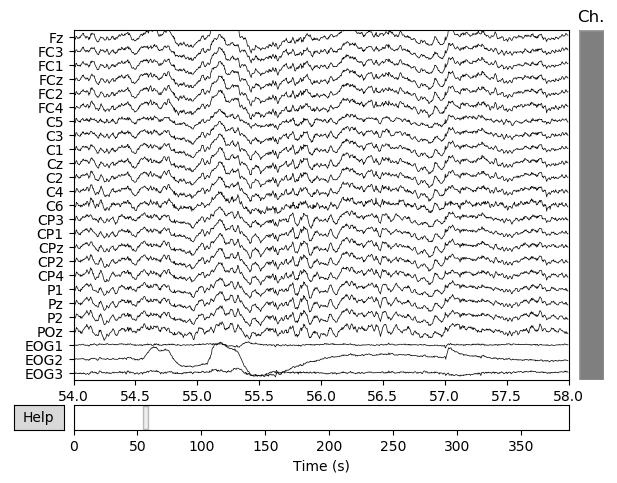

In [5]:
raw_copy = raw_tmp.copy()

ica = ICA(method="extended-infomax", random_state=1)
print(ica)
ica.fit(raw_copy)
ica.exclude = [1]
ica.apply(raw_copy)
raw_copy.plot(n_channels=25, start=54, duration=4, scalings=dict(eeg=250e-6, eog=750e-6))

raw_tmp.plot(n_channels=25, start=54, duration=4, scalings=dict(eeg=250e-6, eog=750e-6))

When computing the independent components, we also compute the "loadings" that is how much each independent component contribute to the signal from each electrode. One can then map this decomposition onto the skull to understand the spatial evolution of each if the independent components. This is what you see in the above figures. 

We will now remove the component corresponding to the eye movement.

- __According to you, and looking at the figure you generated, what component is the most likely to represent ocular motion?__
- Click on the subplot corresponding to the corresponding component to get more details on this component. 

When considering neural activity signals, you should in general observe a characteristic "alpha" peak. This is an additional indication of a component which is independent from occular activity (see the figure below)

<img src="EEGalphaPeak.jpg" height="300" width="300"/>

source: Relationships between electroencephalographic spectral peaks across frequency bands
S. J. van Albada1,2,3* and P. A. Robinson2,3,4 

Using this information, what component is likely to encode occular motion according to you ?

ICA002

Using the function "plot_sources" from the MNE implementation of ICA, display the EEG recordings. 

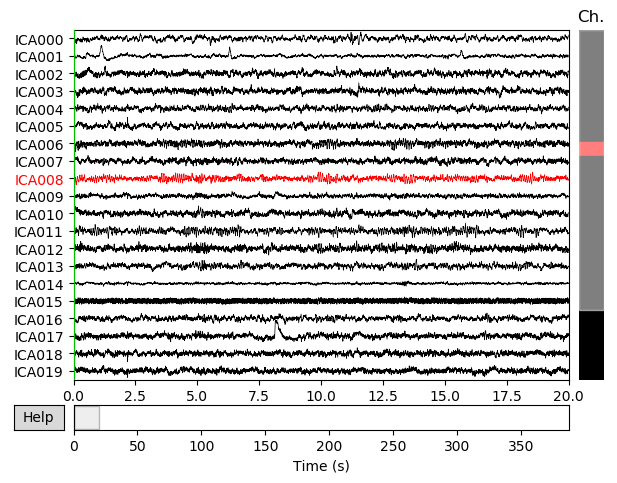

    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows


In [13]:
# put your code here 

ica.plot_sources(inst=raw_tmp)



Can you see any signal that would be significantly different from the others?

- Using the function "exclude" from mne.ICA, remove the component that looks different to you
- Finally visualize the result by using the following two steps

    - Create a copy of the original data with raw.copy()
    - Use the "apply" function from your ICA object to get clean the signals from the occular component 
    - Plot the raw signals together with the function plot from both (1) the raw signal and (2) the corrected one. What do you see?

In [29]:
# put your code here

ica.exclude.extend({})
ica.plot_components(inst=raw_tmp)
print(ica.n_components)

None


### 1.2. Traditional cocktail party: the semblance of privacy

(sound sources: http://sound.media.mit.edu/ica-bench/sources/)

In this second exercice, we will use ICA to extract individual conversations from the recording of mixed sounds. Source separation is a popular application of independent component analysis. It also shows how fragile/idealized the scene from the movie "The Firm" is, when Tom Cruise turns on the music to reveal to his wife, played by Jeanne Tripplehorn, that the law firm for which he works, is led by the mafia. 

In [7]:
import time
import scipy
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

Use the snippet below to load the two independent sounds and listen to those sounds

In [8]:

fs_1, sound1 = wavfile.read("mike.wav")
fs_2, sound2 = wavfile.read("beet92.wav")
# reshaping the files to have same size
m, = sound1.shape 
sound2 = sound2[:m]

# plotting time domain representation of signal
figure_1 = plt.figure("Original Signal")
plt.subplot(2, 1, 1)
plt.title("Time Domain Representation of voice_1")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.plot(sound1)
plt.subplot(2, 1, 2)
plt.title("Time Domain Representation of voice_2")
plt.plot(sound2)
plt.xlabel("Time")
plt.ylabel("Signal")

Text(0,0.5,'Signal')

The lines below are used to mix the sounds. Run those lines

In [9]:
# mix data
mixed = np.c_[sound1, sound2]
A = np.array([[1, 0.5], [0.5, 1]])
X = np.dot(mixed, A)

# plotting time domain representation of mixed signal
figure_2 = plt.figure("Mixed Signal")
plt.subplot(2, 1, 1)
plt.title("Time Domain Representation of mixed voice_1")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.plot(X[:, 0])
plt.subplot(2, 1, 2)
plt.title("Time Domain Representation of mixed voice_2")
plt.plot(X[:, 1])
plt.xlabel("Time")
plt.ylabel("Signal")

scipy.io.wavfile.write('mixed1.wav', fs_1, X[:,0])
scipy.io.wavfile.write('mixed2.wav', fs_1, X[:,1])


Start by listening to the mix. Given the mixed signals stored in X, use FastICA function to recover the sources. Hint(s): 
- Start by initializing a FastICA object 
- Fit the ica object to the data
- Transform the data, using your ICA object and store the result in a new variable
- plot the resulting two signals (those correspond to the first and second columns in the ouptut of your ICA fit)
-then store those signals as .wav files as we did above. Listen to them. Can you understand anything? 

In [14]:
# Put your code here

ica = FastICA()
ica.fit(X)
X_ica = ica.fit_transform(X)

# plotting time domain representation of mixed signal
figure_2 = plt.figure("Mixed Signal")
plt.subplot(2, 1, 1)
plt.title("Time Domain Representation of mixed voice_1")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.plot(X_ica[:, 0])
plt.subplot(2, 1, 2)
plt.title("Time Domain Representation of mixed voice_2")
plt.plot(X_ica[:, 1])
plt.xlabel("Time")
plt.ylabel("Signal")

scipy.io.wavfile.write('recovered1.wav', fs_1, 4*S_[:, 0])
scipy.io.wavfile.write('recovered2.wav', fs_1, 2*S_[:, 1])


NameError: name 'S_' is not defined

### 1.3 Searching for hidden factors in financial time series

(source1: A Hyvarinen, E. Oja, Independent Component Analysis: A Tutorial 
 source2: see for example, A. D. Back and A. S. Weigend, A First Application of Independent Component Analysis to Extracting
Structure from Stock Returns)

In this exercice, you will be given the opportunity to apply ICA to multivariate financial time series such as a portfolio of stocks. In finance, one is usually interested in understanding what drives the motion of a financial time series.

In [15]:


pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
start_date = '2010-01-01'
end_date = '2016-12-31'

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
data1 = pdr.get_data_yahoo("GOOG", start="2017-01-01", end="2018-10-1")
data1 = data1['Close']
data2 = pdr.get_data_yahoo("NVDA", start="2017-01-01", end="2018-10-1")
data2 = data2['Close']
data3 = pdr.get_data_yahoo("FB", start="2017-01-01", end="2018-10-1")
data3 = data3['Close']
data4 = pdr.get_data_yahoo("AAPL", start="2017-01-01", end="2018-10-1")
data4 = data4['Close']
data5 = pdr.get_data_yahoo("IBM", start="2017-01-01", end="2018-10-1")
data5 = data5['Close']
data6 = pdr.get_data_yahoo("MSFT", start="2017-01-01", end="2018-10-1")
data6 = data6['Close']
data7 = pdr.get_data_yahoo("INTC", start="2017-01-01", end="2018-10-1")
data7 = data7['Close']

NameError: name 'pd' is not defined

- Using the snippet from the first homework, plot the time series for each company

- Using the same ICA approach we used for the EEG signals, compute the principal components of the time series. How many components are need to capture most of the trend ?

- Repeat the analysis with principal components. How many components do you need?

## 2. Manifold learning

In this exercice, we will study how, in a very simple framework, one can use the manifold underlying a set of images to denoise those images. 

The data for this exercice is a collection of noisy images of the number 2
<img src="rotation2.png" height="350" width="350">

In [13]:
## use this snippet to import the rotated images. The piece of code just load the sequence of images and store 
## it into a numpy array

import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img=mpimg.imread('your_image.png')


filelist = glob.glob('manifold2/*.png')
x = np.array([np.array(Image.open(fname)) for fname in filelist])
imgplot = plt.imshow(x[1,:,:])
plt.show()

Multi-Dimensional Scaling (MDS) is a non linear dimensionality reduction approach that is used to 
It relies on the following steps

- Compute the proximity matrix $D_{ij} = \|\boldsymbol{x}_i-\boldsymbol{x}_j\|^2$ (in classical Multidimensional scaling,w e assume Euclidean distances)

- Apply double centering to this matrix, through $D\leftarrow -\frac{1}{2}CDC$, using the matrix $C = \text{Id} - \frac{1}{n}\boldsymbol{1}\boldsymbol{1}^T$ where $\text{Id}$ is the identity matrix, $n$ is the number of images and $\boldsymbol{1}$ is a vector of all $1's$.

- Compute the eigenvalue decomposition of the matrix $D$. In this case the sequence of images has a latent representation with no more than 2 degrees of freedom (the images are rotating inside a fixed 2D plane), and we will therefore only keep the largest 2 eigenvalues and the corresponding eigenvectors to derive the lower dimensional representation

- The coordinates of your points in the 2D space are defined from the eigenvalue decomposition, $D = U\Sigma U^T$. I.e if we let $U_2$ and $\Sigma_2$ to denote the matrices encoding the first two eigenvectors and eigenvalues, the coordinates in the 2D space are defined as $X_{2D} = U_2\Sigma_2^{1/2}$. 


__Write your own implementation of MDS for the dataset below. display the 2D embedding. What do you see?__

In [19]:
# put your code here
x2 = np.reshape(x, (20, 250*250))

np.shape(x2)

from scipy.spatial import distance_matrix

D = distance_matrix(x2, x2)
D = D/np.linalg.norm(D, 'fro')

print(D)



[[0.         0.05110768 0.05127055 0.05125248 0.0513123  0.05123312
  0.05137388 0.05150922 0.05131088 0.05117186 0.05125703 0.05141895
  0.05131639 0.05131075 0.05130888 0.05126843 0.05129245 0.05131318
  0.05139888 0.05124652]
 [0.05110768 0.         0.05128347 0.05133762 0.05119013 0.05128921
  0.05136538 0.05158378 0.05147374 0.05121304 0.0512078  0.05118439
  0.05129108 0.05140601 0.05124257 0.05120685 0.05118153 0.05135768
  0.05134891 0.05143856]
 [0.05127055 0.05128347 0.         0.05120495 0.05158607 0.051357
  0.05127712 0.05146758 0.0515246  0.05105152 0.0512292  0.05150884
  0.05141931 0.05134505 0.0513786  0.05118363 0.05133162 0.05146547
  0.05149675 0.05148638]
 [0.05125248 0.05133762 0.05120495 0.         0.05153685 0.05133805
  0.05136337 0.05131271 0.05131299 0.05130496 0.05113081 0.05135734
  0.05123002 0.05134498 0.05116111 0.05103106 0.0515161  0.0511774
  0.051419   0.05124557]
 [0.0513123  0.05119013 0.05158607 0.05153685 0.         0.05123569
  0.05119104 0.0514

__Bonus:__ Use the embedding to denoise the images

## 3. Clustering

In this exerice, we will first use the scipy implementations for 

__3.1__ In this part, you will use hierarchical clustering on a collection of gene expressions measured on cancer cells. This time we will use the clustering functions from scipy. We will need both the "linkage" as well as the "dendrogram" implementations from scipy. The first one will be used to build the cluters, the second to represent those clusters at each step, as a tree.

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

labelCells = pd.read_csv("NCI60_labs.csv", index_col = 0)
geneticDataCells = pd.read_csv("NCI60_data.csv", index_col = 0)

The NCI60 dataset consists of measurements of 6,830 gene expressions on 64 cancer cells. Cancer types are stored in the variable "geneticDataCells".

For now we will ignore those labels and just do unsupervised clustering on the data. 

 - Using the function "linkage" from scipy (see above), get the each of the clusters (at eahc level of the hierarchy)

 - Using the output of the linkage function that you obtained in step 1., plot the corresponding dendrograms for the three types of linkage we studied in class. To plot the dendrogram, you can use the function "dendrogram" giving it as argument the output of "linkage" clustering together with the labels which are stored in "labelCells". Finally, for clarity you should set the parameter "leaf_rotation" to "90"

In [ ]:
# put your code here



__3.2__ Now start from the same dataset and write your own implementation of any of the linkage algorithms.

In [ ]:
# put your code here

